# Implementation of K-Means algorithm from scratch - assignment 5

## Install FFmpeg library

In [1]:
# This is a required library for performing data analysis and visualization related to videos.

# !conda install -y ffmpeg

'conda' is not recognized as an internal or external command,
operable program or batch file.


## Import necessary libraries

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation as animate

rc('animation', html='html5')

## Load the dataset

In [3]:
df = pd.read_csv("../../../assets/data/implementation-Kmeans/basic1.csv")
display(df.head(), df.describe(), df.isnull().sum())

,x,y,color
0,79.408289,152.834424,0
1,98.046263,186.910700,0
2,240.578979,48.473684,1
3,109.687183,277.945769,0
4,249.626082,229.753352,1


,x,y,color
count,9794.000000,9794.000000,9794.000000
mean,248.146076,223.808189,1.070656
std,140.455822,98.769227,1.041717
min,37.595949,13.577945,0.000000
25%,108.772908,150.568069,0.000000
50%,247.643438,214.161286,1.000000
75%,361.518553,288.180956,2.000000
max,560.333464,525.737947,3.000000


x        0
y        0
color    0
dtype: int64

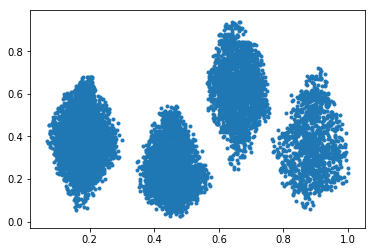

In [4]:
fig = plt.figure()
plt.scatter(df.x/560, df.y/560, marker='.')

## Our own implementation of k-means algorithm

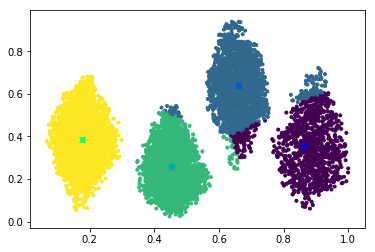

In [5]:
fig, ax = plt.subplots()


class Kmeans:
    def __init__(self, K: int, data, seed=None):
        self.k = K  # k clusters
        if seed is not None:
            np.random.seed(seed)
        self.centroids = np.random.rand(K, 2)

        self.maxval = data.max(axis=0).max()
        self.data = data/self.maxval
        self.labels = np.zeros(len(self.data))

    def _get_closest_class_id(self, X):
        # compute the distance between the sample and all the centroids
        # and return the index of the minimum distance
        d = ((X-self.centroids)**2).sum(axis=1)
        return np.argmin(d)

    def fit(self, tollarence=1e-10):

        ax.clear()
        ax.scatter(self.data[:, 0], self.data[:, 1], c=self.labels, marker='.')

        pervcentroid = self.centroids.copy()
        ax.scatter(pervcentroid[:, 0], pervcentroid[:, 1], c=list(
            range(self.k)), marker='+', cmap='winter')

        for i in range(len(self.data)):
            self.labels[i] = self._get_closest_class_id(self.data[i])

        # calculate the mean of the new clusters
        for k in range(self.k):
            self.centroids[k] = self.data[np.where(
                self.labels == k)].mean(axis=0)

        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], c=list(
            range(self.k)), marker='x', cmap='winter')


train = df.iloc[:, :-1].to_numpy()
a = Kmeans(4, train, 10)

plots1 = animate(fig, a.fit, frames=10, interval=1000, repeat=False)
plots1

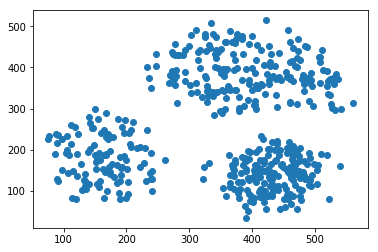

In [6]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/sparse.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [7]:
a = Kmeans(3, data, 17)
plots1 = animate(fig, a.fit, frames=10, interval=1000, repeat=False)
plots1

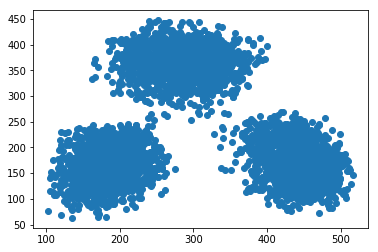

In [8]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/basic5.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [9]:
a = Kmeans(3, data, 17)
plots2 = animate(fig, a.fit, frames=10, interval=1000, repeat=False)
plots2

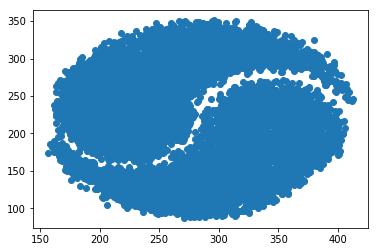

In [10]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/spiral2.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [11]:
a = Kmeans(2, data, 10)
plots2 = animate(fig, a.fit, frames=30, interval=1000, repeat=False)
plots2

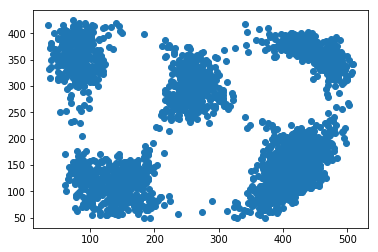

In [12]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/network.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [13]:
a = Kmeans(5, data, 10)
plots2 = animate(fig, a.fit, frames=10, interval=2000, repeat=False)
plots2

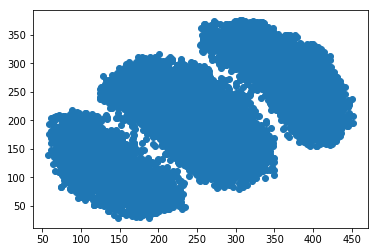

In [14]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/basic4.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [15]:
a = Kmeans(3, data, 10)
plots2 = animate(fig, a.fit, frames=30, interval=1000, repeat=False)
plots2

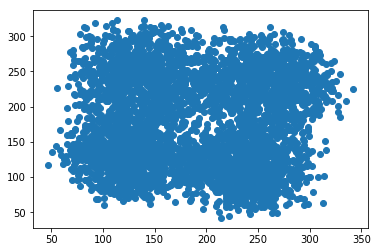

In [16]:
df = pd.read_csv('../../../assets/data/implementation-Kmeans/blob.csv')
data = df.iloc[:, :-1].to_numpy()
plt.scatter(df.x, df.y)

In [17]:
a = Kmeans(4, data, 10)
plots2 = animate(fig, a.fit, frames=30, interval=1000, repeat=False)
plots2

## Acknowledgments
Thanks to Rajarshi Banerjee for creating the Notebook [Implementation of K-Means algorithm from scratch](https://www.kaggle.com/code/banerz/implementation-of-k-means-algorithm-from-scratch), lisensed under the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0). It inspires the majority of the content in this chapter.